#Computer_vision_mid_exam
##2016316_Choinara


#Otsu 알고리즘
##1단계: 컬러 영상 읽고 RGB channel 및 gray 영상을 구하시오 
- 첨부된 highway.jpg 영상을 사용하시오
- 영상 읽고 gray 영상으로 변환하기 (opencv 및 matplotlib 모두 사용 가능함)

##영상을 읽은 후 
- gray 영상은 gray_img로 저장하시오 

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

Saving highway.jpg to highway (1).jpg
User uploaded file "highway.jpg" with length 256626 bytes
1536 2048


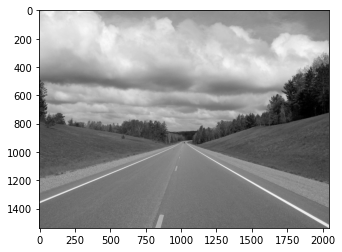

In [35]:

#영상을 읽은 gray 영상을 저장하기 위한 코드를 작성하시오
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    
from IPython.display import Image
Image('highway.jpg')

image = cv2.imread('highway.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#영상의 RGB채널 구하기
R_channel = image[:, :, 0]
G_channel = image[:, :, 1]
B_channel = image[:, :, 2]

#주어진 gray 영상의 가로 길이를 width, 세로 길이를 height로 저장, gray 영상으로 잘 변환되었는지 확인
height, width = gray_img.shape
print(height, width)
plt.imshow(gray_img, cmap='gray')
plt.show()


##2단계: 히스토그램, 정규화된 히스토그램, 정규화된 누적히스토그램 함수 작성
- 히스토그램 구하기 위한 함수를 histogram 함수 이름으로, 정규화된 히스토그램 함수를 normal_histogram, 정규화된 누적히스토그램 함수를 normal_CDF 이름으로 함수를 작성하시오

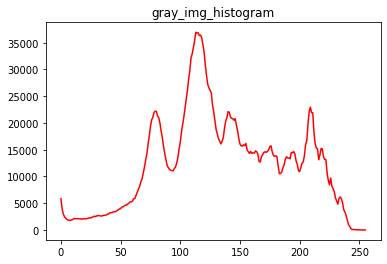

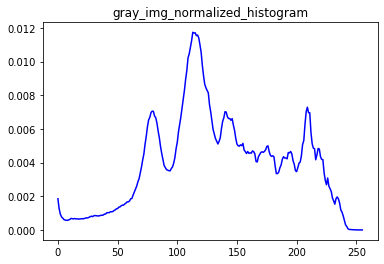

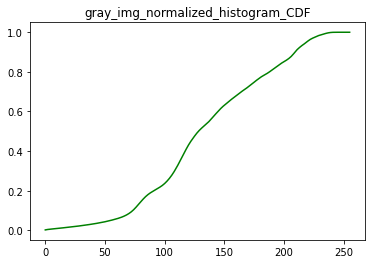

In [36]:
#히스토그램 구하기 위한 함수를 작성하시오 (도수는 256의 크기를 갖고 있음)

def histogram(image):
  img_hist = np.zeros(256, np.int32)
  for i in range(0, height):
    for j in range(0, width):
      img_hist[image[i][j]] += 1
  return img_hist

gray_img_hist = histogram(gray_img)
plt.plot(gray_img_hist, 'red')
plt.title('gray_img_histogram')
plt.show()

#정규화된 히스토그램 구하기 위한 함수를 작성하시오
def normal_histogram(image):
  img_hist_norm = np.zeros(256, np.int32)
  for i in range(0, height):
    for j in range(0, width):
      img_hist_norm[image[i][j]] += 1

  img_hist_norm = img_hist_norm/(width*height)
  return img_hist_norm

gray_img_hist_norm = normal_histogram(gray_img)
plt.plot(gray_img_hist_norm, 'blue')
plt.title('gray_img_normalized_histogram')
plt.show()

#정규화된 히스토그램으로부터 누적히스토그램을 구하기 위한 함수를 작성하시오
def normal_CDF(img_hist_norm):
  img_norm_CDF = img_hist_norm
  for i in range(1, len(img_hist_norm)):
      img_norm_CDF[i] = img_hist_norm[i-1] + img_hist_norm[i]
  return img_norm_CDF  

gray_img_norm_CDF = normal_CDF(gray_img_hist_norm)
plt.plot(gray_img_norm_CDF, 'green')
plt.title('gray_img_normalized_histogram_CDF')
plt.show()


#3단계: Otsu 알고리즘의 초기화
- 알고리즘을 구하기 전에 필요시 아래와 같은 변수를 활용하여도 좋으며, 필요없으면 사용하지 않아도 됨
- 알고리즘 구현시 np.hsplit: 주어진 배열을 두개로 나눌 때 활용 가능

In [4]:
#initialization
bins = np.arange(256)
fn_min = np.inf
thresh = -1
#정규히스토그램 및 누적정규히스토그램
hist = cv2.calcHist([gray_img], [0], None, [256], [0,256])
hist_norm = hist.ravel()/hist.max()
CDF = hist_norm.cumsum()

#Otsu algorithm 코드를 작성하어 threshold 값을 구하시오

for i in range(1,256):
  pro1,pro2 = np.hsplit(hist_norm, [i])
  cdf1 = CDF[i]
  cdf2 = CDF[255]-CDF[i]
  
  if cdf1==0:
    cdf1 = 0.000000001
  if cdf2==0:
    cdf2 = 0.000000001
    
  w1,w2=np.hsplit(bins,[i])
  mean1 = np.sum(pro1*w1)/cdf1
  mean2 = np.sum(pro2*w2)/cdf2
  variance1 = np.sum(((w1-mean1)**2)*pro1)/cdf1
  variance2 = np.sum(((w2-mean2)**2)*pro2)/cdf2

  fn = variance1*cdf1 + variance2*cdf2
  if fn<fn_min:
    fn_min = fn
    thresh = i


# 자신이 짠 알고리즘과 opencv 알고리즘과 비교 (ret에 otsu 알고리즘을 이용한 threshold 값과 비교)
ret, otsu = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print( "thresh: {} ret:{}".format(thresh, ret))

#이진화하여 binary_img로 저장
binary_img = np.zeros((height, width), np.uint8)

#threshold보다 작은 값은 0, 큰 값은 255를 갖기 위한 프로그램 작성
for i in range(0, height):
  for j in range(0, width):
    if gray_img[i][j] < thresh:
      binary_img[i][j] = 0
    else:
      binary_img[i][j] = 255;



thresh: 144 ret:143.0


##4단계: matplotlib를 이용하여 영상 가시화
- gray_img, binary_img를 subplot을 이용하여 가시화하시오

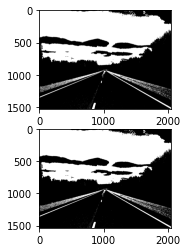

In [5]:
plt.figure(1)
plt.subplot(211)
plt.imshow(otsu,cmap='gray')

plt.subplot(212)
plt.imshow(binary_img,cmap='gray')
plt.show()
            

#영상 라벨링
- 해당 링크의 영상을 읽은 후 img로 저장하시오
- R channel 값을 input_img로 저장하시오

--2020-10-27 06:23:45--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 151.101.40.193
Connecting to i.imgur.com (i.imgur.com)|151.101.40.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2020-10-27 06:23:46 (26.5 MB/s) - ‘iWGMlJR.png’ saved [491/491]



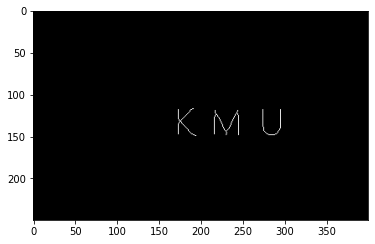

In [72]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png
img = cv2.imread('sample.png')

#R channel만을 input_img로 저장하고 가시화하시오
input_img = img[:,:,0]
plt.imshow(input_img)

plt.imshow(img)

# 과제1: 4연결성 라벨링

## 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
## cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [68]:
import random
#4연결성에 해당되는 부분들의 label이 81까지 있어서 color를 랜덤으로 81개를 생성하여 배열에 담았고 그 것을 output에 담을 것
color_four = [(random.randint(0,255), random.randint(0,255), random.randint(0,255)) for x in range(81)]
output_four = np.zeros((height, width, 3),np.uint8)

ret, dst = cv2.threshold(input_img, 100, 1, cv2.THRESH_BINARY)
height, width = dst.shape
labeled_img = [[0 for col in range(401)] for row in range(251)]

for i in range (1, height):
  for j in range (1, width):
    labeled_img[i][j] = dst[i][j]

for i in range(0, height):
  for j in range(0, width):
    if labeled_img[i][j] == 1:
      labeled_img[i][j] = -1


def four_connect(labeled_img, i, j, label):
  # 함수 작성
  if labeled_img[i][j] == -1:
    labeled_img[i][j] = label
    four_connect(labeled_img, i, j+1, label)
    four_connect(labeled_img, i-1, j, label)
    four_connect(labeled_img, i, j-1, label)
    four_connect(labeled_img, i+1, j, label)
    output_four[i][j] = color_four[label-1]

  return labeled_img
label = 1
for i in range(1, height-1):
  for j in range(1, width-1):
    if labeled_img[i][j] == -1:
      four_connect(labeled_img, i, j, label)
      label = label +1

for i in range(250):
  for j in range(400):
    print(labeled_img[i][j],end='  ')
  print('')


0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

##다른 색상을 갖는 영상을 가시화하기 위한 프로그램 작성
  - matplotlib를 이용하여 가시화하시오

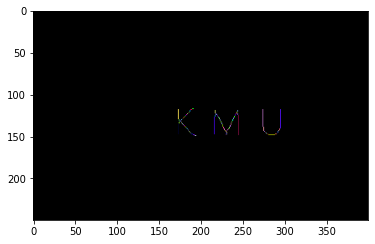

In [69]:

plt.imshow(output_four)

# 과제2: 8연결성 라벨링

## 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
## cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [70]:
#input_img에 대한 8연결성 라벨링 함수를 작성하시오
#4연결성에 해당되는 부분들의 label이 3까지 있어서 color를 랜덤으로 3개를 생성하여 배열에 담았고 그 것을 output에 담을 것
color_eight = [(random.randint(0,255), random.randint(0,255), random.randint(0,255)) for x in range(3)]
output_eight = np.zeros((height, width, 3),np.uint8)

ret, dst = cv2.threshold(input_img, 100, 1, cv2.THRESH_BINARY)
height, width = dst.shape
labeled_img = [[0 for col in range(401)] for row in range(251)]


for i in range (1, height):
  for j in range (1, width):
    labeled_img[i][j] = dst[i][j]

for i in range(0, height):
  for j in range(0, width):
    if labeled_img[i][j] == 1:
      labeled_img[i][j] = -1


def eight_connect(labeled_img, i, j, label):
  # 함수 작성
  if labeled_img[i][j] == -1:
    labeled_img[i][j] = label
    eight_connect(labeled_img, i, j+1, label)
    eight_connect(labeled_img, i-1, j, label)
    eight_connect(labeled_img, i, j-1, label)
    eight_connect(labeled_img, i+1, j, label)
    eight_connect(labeled_img, i-1, j-1, label)
    eight_connect(labeled_img, i-1, j+1, label)
    eight_connect(labeled_img, i+1, j-1, label)
    eight_connect(labeled_img, i+1, j+1, label)
    output_eight[i][j] = color_eight[label-1]

  return labeled_img
label = 1
for i in range(1, height-1):
  for j in range(1, width-1):
    if labeled_img[i][j] == -1:
      eight_connect(labeled_img, i, j, label)
      label = label +1

for i in range(250):
  for j in range(400):
    print(labeled_img[i][j],end='  ')
  print('')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

##다른 색상을 갖는 영상을 가시화하기 위한 프로그램 작성




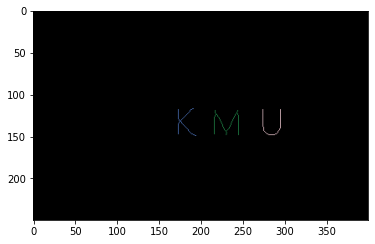

In [71]:
plt.imshow(output_eight)